In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
# red와인과
# white와인
print(red.head())  #head()는 데이터의 일부행만 보여준다. 기본은 5개
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# pandas 데이터에 type 속성(column)을 추가.
red['type'] = 0
white['type'] = 1
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [4]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [5]:
# 두 pandas 데이터 합침
wine = pd.concat([red,white])
# 13가지 속성!

In [6]:
wine.describe() # 전체 통계값!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
import matplotlib.pyplot as plt

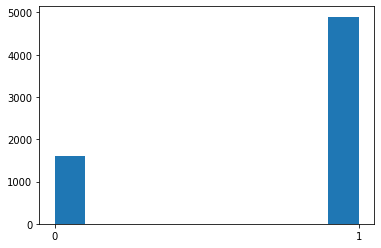

In [8]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

In [9]:
# white의 데이터양이 훨씬 많다.
wine['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [10]:
# 속성 값에 null값이 있으면 정규화 진행에 error가 나올 수 있다, 
# info를 통해서 확인!! Non Null은 null이 없다는 듯
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [11]:
# 간단한 정규화... ->  (현재값 - 최소값)  /  (최대값과 최소값의 차이)    => 최소값은 0 ~~ 최대값은 1   이 되게 정규화
wine_norm = (wine - wine.min()) / (wine.max()-wine.min())

wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [12]:
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
import numpy as np

In [14]:
# sample은 frac비율만큼 랜덤으로 뽑는 함수,,,frac = 1은 100% 의미
wine_shuffle = wine_norm.sample(frac = 1)
wine_shuffle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
812,0.578512,0.246667,0.198795,0.029141,0.149502,0.065972,0.073733,0.213418,0.403101,0.275281,0.405797,0.333333,0.0
887,0.570248,0.293333,0.228916,0.030675,0.094684,0.097222,0.115207,0.166956,0.333333,0.320225,0.594203,0.666667,0.0
3604,0.297521,0.186667,0.138554,0.019939,0.013289,0.104167,0.145161,0.040293,0.162791,0.078652,0.652174,0.500000,1.0
3122,0.148760,0.066667,0.162651,0.016871,0.034884,0.104167,0.223502,0.034895,0.488372,0.084270,0.710145,0.500000,1.0
3147,0.280992,0.160000,0.240964,0.124233,0.048173,0.152778,0.341014,0.165221,0.372093,0.140449,0.347826,0.500000,1.0


In [15]:
#numpy화
wine_np = wine_shuffle.to_numpy()
# 이차원 배열,,행 * 속성
print(wine_np.shape)
wine_np

(6497, 13)


array([[0.5785124 , 0.24666667, 0.19879518, ..., 0.4057971 , 0.33333333,
        0.        ],
       [0.57024793, 0.29333333, 0.22891566, ..., 0.5942029 , 0.66666667,
        0.        ],
       [0.29752066, 0.18666667, 0.13855422, ..., 0.65217391, 0.5       ,
        1.        ],
       ...,
       [0.21487603, 0.09333333, 0.22891566, ..., 0.43478261, 0.66666667,
        1.        ],
       [0.23966942, 0.14666667, 0.29518072, ..., 0.27536232, 0.5       ,
        1.        ],
       [0.70247934, 0.20666667, 0.37951807, ..., 0.2173913 , 0.33333333,
        0.        ]])

In [16]:
#80퍼센트 인덱스 지점,, 훈련데이터 구분
# 입력은 12가지 속성 마지막은 제외!  #정답 y는 타입 1인지 0인지
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print("train_Y:\n",train_Y.shape,"\n",train_Y)
print("test_Y:\n",test_Y.shape,"\n",test_Y)
# to_categorical 함수는 one- hot 인코딩 형식으로

# 정답 인덱스에 1을 넣어주는 방식의 행렬로 바꿔준다.
# num_classes는 원샷 핫코딩의 정답 index가 몇개인지 결정해준다.
train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=2)
print("train_Y:\n",train_Y.shape,"\n",train_Y)
print("test_Y:\n",test_Y.shape,"\n",test_Y)

train_Y:
 (5197,) 
 [0. 0. 1. ... 0. 0. 1.]
test_Y:
 (1300,) 
 [1. 0. 1. ... 1. 1. 0.]
train_Y:
 (5197, 2) 
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
test_Y:
 (1300, 2) 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [17]:
#모델 생성
#분류 모델이기때문에 , 마지막 활성화 함수는 softmax로 생성!
# 소프트맥스 활성화 함수에는,  교차 엔트로피를 손실함수로 써야 backpropagation의 값이 처음에 딱 떨어진다.
# 마지막 output이 2개
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=12,activation='relu'),
    tf.keras.layers.Dense(units=2,activation='softmax')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 25번 총 반복
# 한번에 32개 데이터씩 학습
# 검증데이터는 1/4 !!
history = model.fit(train_X,train_Y,epochs=30,batch_size =32,validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/30
3897/3897 [==============================] - 1s 180us/sample - loss: 0.1512 - accuracy: 0.9497 - val_loss: 0.0531 - val_accuracy: 0.9854
Epoch 2/30
3897/3897 [==============================] - 0s 43us/sample - loss: 0.0707 - accuracy: 0.9805 - val_loss: 0.0944 - val_accuracy: 0.9754
Epoch 3/30
3897/3897 [==============================] - 0s 44us/sample - loss: 0.0606 - accuracy: 0.9859 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 4/30
3897/3897 [==============================] - 0s 48us/sample - loss: 0.0534 - accuracy: 0.9856 - val_loss: 0.0482 - val_accuracy: 0.9900
Epoch 5/30
3897/3897 [==============================] - 0s 44us/sample - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 6/30
3897/3897 [==============================] - 0s 44us/sample - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0596 - val_accuracy: 0.9838
Epoch 7/30
3897/3897 [==============================] - 0s 44us/sampl

In [21]:
import matplotlib.pyplot as plt

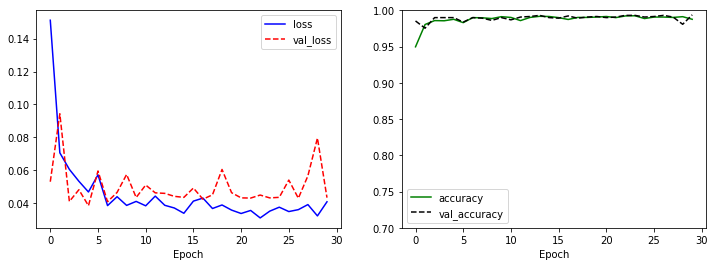

In [23]:
plt.figure(figsize=(12,4))
# 그래프 여러개를 보여주기 위해서 
# 1 * 2 크기로 1번째 sub plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-',label = 'loss') #블루 실선으로, loss 값
plt.plot(history.history['val_loss'],'r--',label="val_loss") # 검증 데이터 loss값..
plt.xlabel('Epoch')
plt.legend()

# 1*2 크기맵에 2번째 그래프
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [24]:
model.evaluate(test_X,test_Y)

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.024171615755901887, 0.9946154]

# 이번에는 품질을 분류하는 모델!

In [25]:
wine['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [26]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

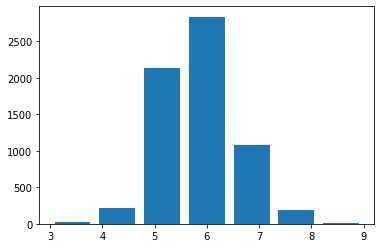

In [27]:
# 각 퀄리티 별 개수 확인
plt.hist(wine['quality'],bins=7,rwidth=0.8)
plt.show()

In [28]:
#loc을 통해서 골라내기!
#loc은 배열 인덱싱을 통해 데이터의 행을 골라낸다.
# loc의 두번째 인자는 열을 나타낸다.
# quality의 값에 따라 새로운 열 nqual을 추가하여 값을 배정한다.
wine.loc[wine['quality'] <=5,'nqual'] = 0
wine.loc[wine['quality'] == 6,'nqual'] = 1
wine.loc[wine['quality']>=7,'nqual'] = 2

In [29]:
wine['nqual'].describe()

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: nqual, dtype: float64

In [30]:
wine['nqual'].value_counts()

1.0    2836
0.0    2384
2.0    1277
Name: nqual, dtype: int64

In [31]:
# 판다스에서 quality 열 삭제  이게 정답 레이블이 될것이므로
del wine['quality']
wine_norm =  (wine - wine.min()) / (wine.max() - wine.min()) #(wine - wine.mean())/ wine.std()  #책과는 다르게 표준화로 한번 계산
                                                              # 표준화로 했을경우 정확도가 떨어짐
wine_shuffle = wine_norm.sample(frac = 1) # 1비율(100퍼센트) 샘플을 랜덤으로 골라뽑음 = 셔플함
wine_np = wine_shuffle.to_numpy()

In [32]:
print(wine_np)
wine # 기존에 있던 quality col은 빠졌다.

[[0.31404959 0.1        0.15662651 ... 0.17391304 1.         0.        ]
 [0.21487603 0.52333333 0.01807229 ... 0.68115942 0.         0.5       ]
 [0.23966942 0.03333333 0.1686747  ... 0.30434783 1.         1.        ]
 ...
 [0.29752066 0.12666667 0.29518072 ... 0.44927536 1.         0.5       ]
 [0.41322314 0.08       0.25903614 ... 0.11594203 1.         0.5       ]
 [0.29752066 0.08666667 0.1626506  ... 0.26086957 1.         0.5       ]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,nqual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [33]:
train_idx = int(len(wine_np)*0.8) #80퍼센트를 훈련데이터로
train_X, train_Y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]  # nqual을 정답 데이터로!! 등급맞추기!
test_X, test_Y = wine_np[train_idx:,:-1], wine_np[train_idx:,-1]    # test data

In [34]:
train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=3)  # 원 핫코딩 방식으로 각 데이터마다 리스트로 만듬
test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=3)

In [35]:
train_Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [36]:
test_Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape = (12,)), # 12 col 데이터 입력
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=12,activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

In [45]:
model.compile(optimizers = tf.keras.optimizers.Adam(lr = 0.04),loss = "categorical_crossentropy",metrics = ['accuracy']) 
# accuracy도 측정하게끔 컴파일 #마지막 매개변수 없으면  loss만 알려줌

In [46]:
history = model.fit(train_X,train_Y, epochs = 50,batch_size = 32, validation_split = 0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/50
3897/3897 [==============================] - 1s 151us/sample - loss: 0.5551 - accuracy: 0.7986 - val_loss: 0.4581 - val_accuracy: 0.7969
Epoch 2/50
3897/3897 [==============================] - 0s 46us/sample - loss: 0.4218 - accuracy: 0.8086 - val_loss: 0.4201 - val_accuracy: 0.7954
Epoch 3/50
3897/3897 [==============================] - 0s 45us/sample - loss: 0.4066 - accuracy: 0.8173 - val_loss: 0.4098 - val_accuracy: 0.8077
Epoch 4/50
3897/3897 [==============================] - 0s 47us/sample - loss: 0.3991 - accuracy: 0.8181 - val_loss: 0.4176 - val_accuracy: 0.7954
Epoch 5/50
3897/3897 [==============================] - 0s 45us/sample - loss: 0.3947 - accuracy: 0.8188 - val_loss: 0.4010 - val_accuracy: 0.8031
Epoch 6/50
3897/3897 [==============================] - 0s 48us/sample - loss: 0.3907 - accuracy: 0.8237 - val_loss: 0.3987 - val_accuracy: 0.8069
Epoch 7/50
3897/3897 [==============================] - 0s 48us/sampl

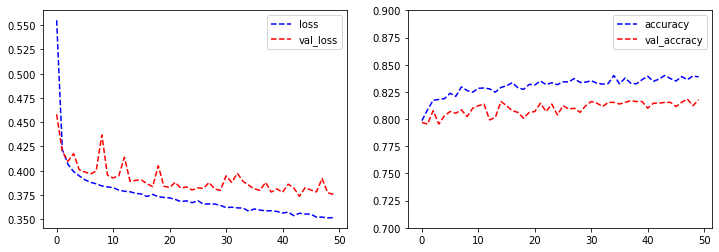

In [65]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend() # 레전드는 선 라벨이름

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b--',label='accuracy')
plt.plot(history.history['val_accuracy'],'r--',label='val_accracy')
plt.ylim(0.7,0.9)
plt.legend()
plt.show()